                                    NPV – Mini-Project 
                                    
                                    
A Company is having its offices across all locations of India. These locations are categorized with respect to zones.  The company has decided to give medical expenditure benefits to their employees.  The company has collected the medical expenditure of all the employees for the year 2019.  The company also collected some other health and family related data of all employees like number of dependents, age, bmi, smoking and alcoholic habits.
 Answer the following questions to provide insight into the collected dat.
Dataset details ** 
id: Employee id - unique
age: age of primary beneficiary
sex: Gender data - female, male
bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
dependent: Number of children other family members who are not earning and dependent on employee.
alcohol: Alcohol consumption habit. Possible values - daily, weekend, party, no, rarely
smoker: Smoking habit.
zone: The office location zones. Possible values - east, west, south, north, northeast, southeast, southwest, northwest.
expenditure: Individual medical expenditure by employees during year 2019

 Read the dataset and do primary study of data. Perform following steps: 
 a. Reading some rows of dataset
 b. Learn data types of all features
 c. See the statistical properties of the data.



In [1]:
#importing required libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

import seaborn as sb

In [2]:
#loading dataset
df_med = pd.read_csv("emp_health.csv")   #Loading dataset

df_med.info()  #Dtype of each column with non-null count details.

df_med.describe() #Statistical Properties of Dataset




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           1338 non-null   object 
 1   age          1338 non-null   int64  
 2   sex          1338 non-null   object 
 3   bmi          1338 non-null   float64
 4   dependent    1338 non-null   int64  
 5   alcohol      1338 non-null   object 
 6   smoke        1338 non-null   object 
 7   zone         1338 non-null   object 
 8   expenditure  1338 non-null   float64
dtypes: float64(2), int64(2), object(5)
memory usage: 94.2+ KB


,age,bmi,dependent,expenditure
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
df_med.head()  #Loading some rows of dataset

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
0,i10012,19,female,27.900,0,daily,yes,southwest,16884.92400
1,i10013,18,male,33.770,1,weekend,no,south,1725.55230
2,i10014,28,male,33.000,3,rarely,no,south,4449.46200
3,i10015,33,male,22.705,0,daily,no,northwest,21984.47061
4,i10016,32,male,28.880,0,party,no,northwest,3866.85520


1. How many employees above 50 age smoke, what is their average expenditure on health management?

In [4]:
df_med1 = df_med[(df_med['age']>50) & (df_med['smoke']=='yes')]

exp = np.round(df_med1['expenditure'].mean(),2)


print("Employess with age > 50yrs with smoking habit\n\n",df_med1)

print("Average Expenditure of {} employees is:Rs  {}".format(df_med1['id'].count(),exp))



Employess with age > 50yrs with smoking habit

           id  age     sex     bmi  dependent  alcohol smoke       zone  \
11    i10023   62  female  26.290          0    daily   yes      south   
39    i10051   60    male  39.900          0    daily   yes  southwest   
55    i10067   58    male  36.955          2  weekend   yes  northwest   
58    i10070   53  female  22.880          1    daily   yes      south   
86    i10098   57  female  31.160          0       no   yes  northwest   
...      ...  ...     ...     ...        ...      ...   ...        ...   
1265  i11277   64    male  23.760          0  weekend   yes  southeast   
1284  i11296   61    male  36.300          1    daily   yes  southwest   
1301  i11313   62    male  30.875          3       no   yes       west   
1321  i11333   62    male  26.695          0    daily   yes       east   
1337  i11349   61  female  29.070          0       no   yes       west   

      expenditure  
11    27808.72510  
39    48173.36100  
55 

2. How many female employees did not consume alcohol daily. 
What is their proportion with respect to total female employees?

In [5]:
C1 = df_med[(df_med['sex'] == 'female') & (df_med['alcohol'] !='daily')]['id'].count()

C2 = df_med[df_med['sex'] == 'female']['id'].count()

print(C2)
            
print("Count of Female employees who Didnot consume alcohol daily: ",C1)

print("Percentage of Female employees who Didnot consume alcohol daily: ",np.round(C1/C2 * 100,2),"%")

662
Count of Female employees who Didnot consume alcohol daily:  453
Percentage of Female employees who Didnot consume alcohol daily:  68.43 %


3. Display zone wise average expenditure of employees on health
 


In [6]:
np.round(df_med.groupby('zone')['expenditure'].mean(),2)

zone
east         13774.68
north        14102.58
northeast    13694.72
northwest    12151.70
south        14715.69
southeast    14452.95
southwest    12717.08
west         12183.00
Name: expenditure, dtype: float64

4. Employees of which zone did maximum expenditure on health
 


In [8]:

zone_max = df_med['zone'][df_med['expenditure']== df_med['expenditure'].max()]

print("Zone of Maximum expenditure: ",zone_max)

Zone of Maximum expenditure:  543    southeast
Name: zone, dtype: object


5. What is the minimum expenditure done by any employee in organization
 


In [9]:
min1 = np.round(df_med['expenditure'].min(),2)

print("Minimum expenditure done by employee: Rs  ",min1)


Minimum expenditure done by employee: Rs   1121.87


6. What is average expenditure of employees who have 2 or lesser dependents
 

In [10]:
mean1 = np.round(df_med[df_med['dependent'] <= 2]['expenditure'].mean(),2)

print("Avg Expenditure of employees with < 2 dependents: Rs",mean1)

Avg Expenditure of employees with < 2 dependents: Rs 13040.97


Type Markdown and LaTeX:  𝛼2

7. How many employees are below age of 20 years. What is their average BMI

In [11]:
count1 = df_med[df_med['age'] < 20]['id'].count()

avg_bmi = np.round(df_med[df_med['age'] < 20]['bmi'].mean(),2)

print("Count of employees below 20yrs : {} & their avg BMI is {}.".format(count1,avg_bmi))

Count of employees below 20yrs : 137 & their avg BMI is 29.97.


8. Create a dataframe "non_smoker" for all non-smoker male employees

In [85]:
non_smoker = df_med[(df_med['smoke']=='no') & (df_med['sex']=='male')]


print(type(non_smoker),"\n",non_smoker)

<class 'pandas.core.frame.DataFrame'> 
           id  age   sex     bmi  dependent  alcohol smoke       zone  \
1     i10013   18  male  33.770          1  weekend    no      south   
2     i10014   28  male  33.000          3   rarely    no      south   
3     i10015   33  male  22.705          0    daily    no  northwest   
4     i10016   32  male  28.880          0    party    no  northwest   
8     i10020   37  male  29.830          2    party    no      north   
...      ...  ...   ...     ...        ...      ...   ...        ...   
1324  i11336   31  male  25.935          1    daily    no       west   
1325  i11337   61  male  33.535          0    party    no       east   
1327  i11339   51  male  30.030          1    daily    no  southeast   
1329  i11341   52  male  38.600          2    party    no  southwest   
1333  i11345   50  male  30.970          3       no    no       west   

      expenditure    Category  
1      1725.55230  Overweight  
2      4449.46200  Overweight  

 9. Create a dataframe "non_alcoholic" for all male employees who do not consume alcohol

In [86]:
non_alcoholic = df_med[(df_med['alcohol']=='no')& (df_med['sex']=='male')]

print(type(non_alcoholic),"\n",non_alcoholic)

<class 'pandas.core.frame.DataFrame'> 
           id  age   sex     bmi  dependent alcohol smoke       zone  \
18    i10030   56  male  40.300          0      no    no  southwest   
24    i10036   37  male  28.025          2      no    no  northwest   
28    i10040   23  male  17.385          1      no    no  northwest   
37    i10049   26  male  20.800          0      no    no  southwest   
38    i10050   35  male  36.670          1      no   yes      north   
...      ...  ...   ...     ...        ...     ...   ...        ...   
1291  i11303   19  male  34.900          0      no   yes  southwest   
1301  i11313   62  male  30.875          3      no   yes       west   
1310  i11322   42  male  26.315          1      no    no       west   
1320  i11332   31  male  31.065          3      no    no       west   
1333  i11345   50  male  30.970          3      no    no       west   

      expenditure     Category  
18    10602.38500   Overweight  
24     6203.90175   Overweight  
28     2

10. Create a dataframe called "non_smoking_alcoholic" with the men employees who do not smoke and consume alcohol. The dataframe should contain columns id, smoke, alcohol
 (Hint:Use join and dataframes created in Q8 and Q9)

In [114]:
non_smoking_alcoholic = non_smoker[['id','smoke']].join(non_alcoholic['alcohol'],how = 'inner',rsuffix ='_y')

print(non_smoking_alcoholic)

          id smoke alcohol_y
18    i10030    no        no
24    i10036    no        no
28    i10040    no        no
37    i10049    no        no
67    i10079    no        no
...      ...   ...       ...
1261  i11273    no        no
1270  i11282    no        no
1310  i11322    no        no
1320  i11332    no        no
1333  i11345    no        no

[109 rows x 3 columns]


11.What is the count for each zone with respect to number of dependent

In [12]:
df_med.groupby('zone')['dependent'].count()

zone
east         262
north         70
northeast     74
northwest    145
south         84
southeast    198
southwest    251
west         254
Name: dependent, dtype: int64

12. Classify the employees into 3 categories.

 Category 1 : employees below 18.5 bmi - underweight
 Category 2 : employees with bmi in the range of 18.5 to 24.9 - fit
 Category 3 : employee with bmi over 24.9 - overweight
 What is the average expenditure of employees in each category.
 Display the bar chart for the same
 


<AxesSubplot:title={'center':'Avg Medical Expenditure vs BMI Category'}, xlabel='Category', ylabel='expenditure'>

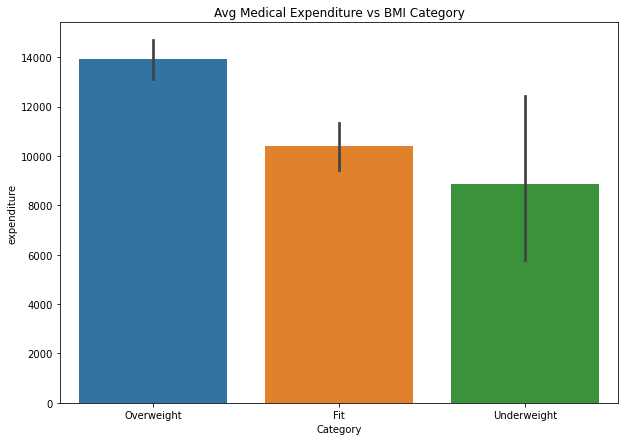

In [13]:
df_med['Category'] = ['Underweight' if x < 18.5 else 'Fit' if 18.5 < x < 24.9 else 'Overweight' for x in df_med['bmi']]

df_med

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

fig,ax = plt.subplots(figsize = (10,7))

ax.set_title("Avg Medical Expenditure vs BMI Category")
ax.set_xlabel('BMI Category')
ax.set_ylabel('Avg Expenditure,Rs')

sb.barplot(x = df_med['Category'],y = df_med['expenditure'])



We can observe from the above plot that Medical expenditure of Overweight people is the highest. We can see a strong relation between BMI and Medical expenditure. As BMI increases (sign of poor health), Medical expenditure also increases.

13. Draw line plot of expenditure against age and BMI
 


Text(0.5, 1.0, 'Study of Age vs Medical expenditure with BMI Category')

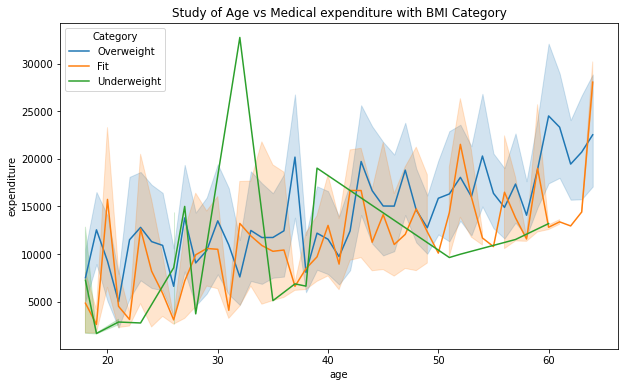

In [123]:
fig1,ax = plt.subplots(figsize = (10,6))

sb.lineplot(x = 'age',y='expenditure',data = df_med,hue = 'Category')

plt.title('Study of Age vs Medical expenditure with BMI Category')

In the above graph, the following observations can be made:
1. Age vs Medical expenditure - As age increases, medical expenditure also increases.
2. BMI vs Medical expenditure - The expenditure for Underweight people (in the age group of within 40 yrs) has the highest expenditure


14. Draw a bar chart to show zone wise average expenditure
 


Text(0.5, 1.0, 'Zone wise Avg Medical expenditure')

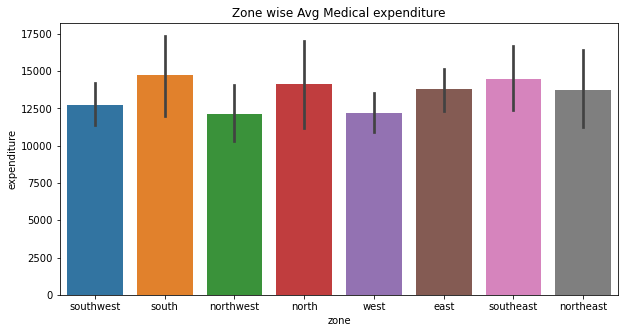

In [15]:
fig,ax1 = plt.subplots(figsize = (10,5))
sb.barplot(x = df_med['zone'], y = df_med['expenditure'])
plt.title("Zone wise Avg Medical expenditure")

In the above plot, we can notice that the variation of Avg expenditure among 8 zones is not profound.

15. Draw a bar chart to show smoking and alcoholic habits against average expenditure
 

Text(0.5, 1.0, 'Avg Expenditure Vs Alcohol Consumption')

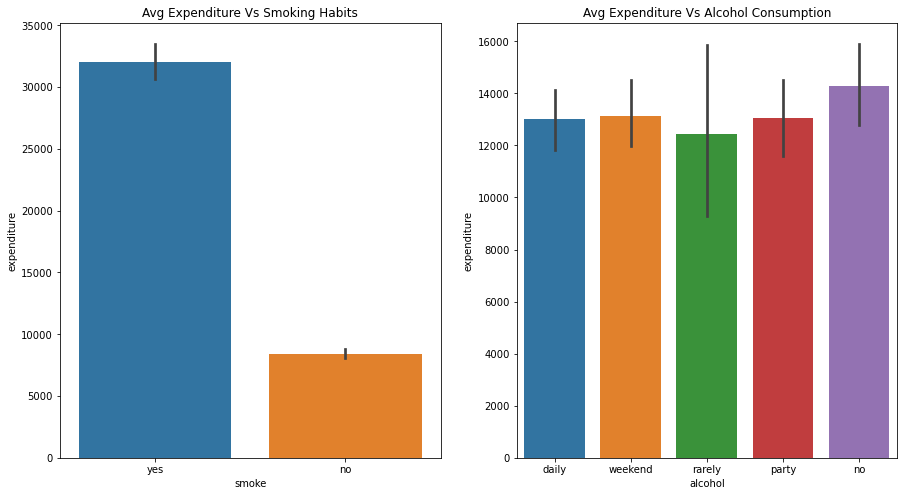

In [137]:
fig,ax = plt.subplots(1,2,figsize = (15,8))

sb.barplot(ax=ax[0],x = df_med['smoke'],y = df_med['expenditure'])

sb.barplot(ax=ax[1],x = df_med['alcohol'],y = df_med['expenditure'])

ax[0].set_title("Avg Expenditure Vs Smoking Habits")

ax[1].set_title("Avg Expenditure Vs Alcohol Consumption")



From the above graphs, we can conclude that Smokers have higher medical expenditure.
For alcohol consumption, the variation in medical expenditure is very little for employees with varying frequency of consumption.

16. Draw pie chart for alcohol consumption habits
 



Text(0.5, 1.0, 'Employees Alcohol Consumption Habits')

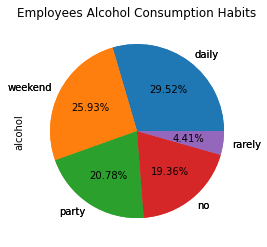

In [122]:
df_med['alcohol'].value_counts().plot(kind='pie',labels =['daily','weekend','party','no','rarely'])

plt.pie(df_med['alcohol'].value_counts(),labels =['daily','weekend','party','no','rarely'],autopct ="%0.2f%%")

plt.title('Employees Alcohol Consumption Habits')

It can be inferred from the above pie chart that employees who do not consume alcohol constitute a very small percentage of 4.4%. Whereas among the alcohol consumers, employees who consume daily have the highest percentage of 29.5% followed by employees who consume only on weekends at 25.93%.

17. Draw scatterplot to see the relation between age and expenditure, keep smoking habit as hue

Text(0.5, 1.0, 'Age vs Expenditure (for Smokers/Non-smokers)')

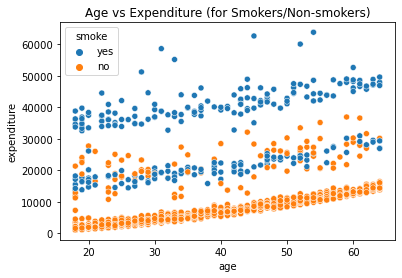

In [18]:
sb.scatterplot(x = df_med['age'],y = df_med['expenditure'],hue = 'smoke',data = df_med)
plt.title("Age vs Expenditure (for Smokers/Non-smokers)")

We can conclude that even though medical expenditure increases with age, when checking from smoking habit point of view, Smokers have the highest expenditure and Non-smokers have the lowest expenditure.


18. Draw distribution plot of expenditure

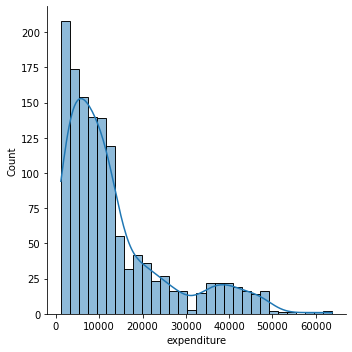

In [303]:
sb.displot(df_med['expenditure'],kde = True)

It can be observed a major count of employees have medical expenditure within Rs.15000.

19. Display the pairplot
 

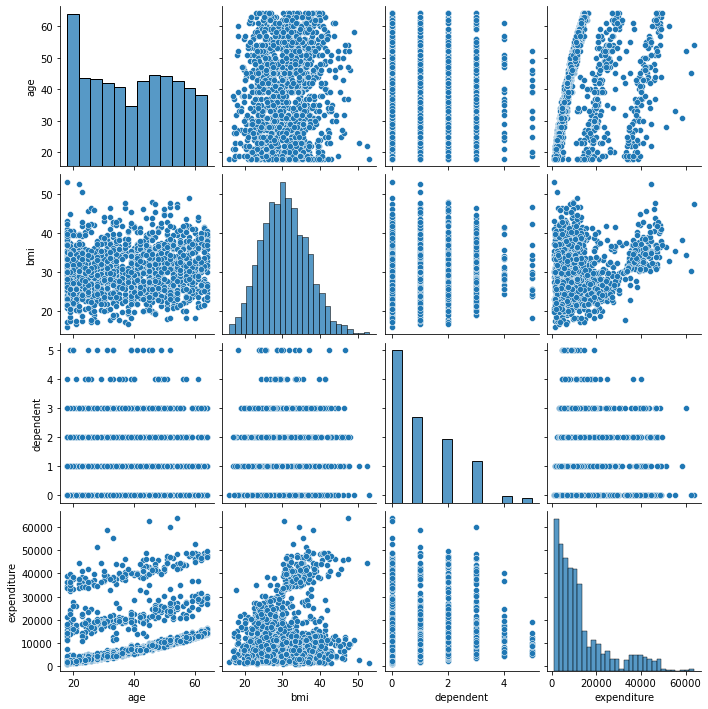

In [298]:
sb.pairplot(df_med)

20. Display heatmap for the data

<AxesSubplot:>

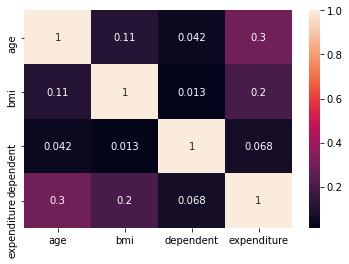

In [258]:
df_med.corr()

sb.heatmap(df_med.corr(),annot = True)



From the above Heatmap, Age vs expenditure and BMI vs medical expenditure have the strongly positive correlation.